In [1]:
# Import Library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
import os

import warnings
warnings.filterwarnings("ignore")

C:\Users\samee\AppData\Local\Temp\ipykernel_1928\1811958503.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
%pwd

'c:\\workFiles\\DS\\end_to_end\\Project_Nature\\project_nature'

In [3]:
# Test and Train path
train_path = "data/raw/seg_train"
test_path = "data/raw/seg_test"


In [12]:
train_data

In [4]:
# The number of classes of dataset
numberOfClass = len(glob(train_path + "/*"))
print("Number Of Class: ", numberOfClass)

Number Of Class:  6


In [ ]:
# Visualize
img = load_img(train_path + "buildings/0.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [5]:
# The images size in dataset.
image_shape = img_to_array(img)
print(image_shape.shape)

(150, 150, 3)


In [5]:
# Prepare the datasef for vgg16
train_data = ImageDataGenerator().flow_from_directory(train_path, target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_path, target_size = (224,224))

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## Visualization <a id ="1a"></a>
[Go Content](#cont)

In this chapter, I visualized a few images in the dataset.

In [ ]:
for i in os.listdir(train_path):
    for j in os.listdir(train_path + i):
        img = load_img(train_path + i + "/" + j)
        plt.imshow(img)
        plt.title(i)
        plt.axis("off")
        plt.show()
        break

In [6]:
# Import model
vgg16 = VGG16()

In [ ]:
# Layers of vgg16 
vgg16.summary()

In [7]:
# layers of vgg16
vgg16_layer_list = vgg16.layers
for i in vgg16_layer_list:
    print(i)

In [8]:
# add the layers of vgg16 in my created model.
vgg16Model = Sequential()
for i in range(len(vgg16_layer_list)-1):
    vgg16Model.add(vgg16_layer_list[i])

In [ ]:
# the final version of the model
vgg16Model.summary()

In [9]:
# Close the layers of vgg16
for layers in vgg16Model.layers:
    layers.trainable = False

In [10]:
# Last layer
vgg16Model.add(Dense(numberOfClass, activation = "softmax"))

In [ ]:
# After I added last layer in created model.
vgg16Model.summary()

In [11]:
# I create compile part.
vgg16Model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

## Training Model <a id = "2b"></a>
[Go Content](#cont)

In this chapter, I am training with the model at the dataset, and after, I saved the weight of the model.

In [13]:
# Traning with model
batch_size = 32

hist_vgg16 = vgg16Model.fit_generator(train_data, 
                                      steps_per_epoch = 1600 // batch_size, 
                                      epochs = 1, 
                                      validation_data = test_data, 
                                      validation_steps = 800 // batch_size)

50/50 [==============================] - 202s 4s/step - loss: 0.6351 - accuracy: 0.7944 - val_loss: 0.5232 - val_accuracy: 0.8087


In [16]:
vgg16Model.save("model.h5")

In [18]:
# Save the weights of model
vgg16Model.save_weights("deneme.h5")

## Visualize The Result Of Model <a id = "2c"></a>
[Go Content](#cont)

In this chapter, I visualized the result of the vgg16 model.

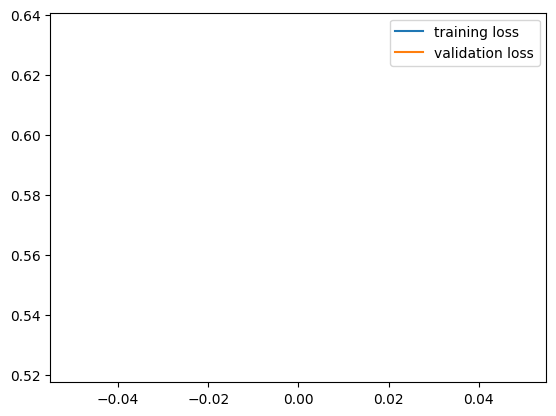

In [15]:
# Loss and Validation Loss
plt.plot(hist_vgg16.history["loss"], label = "training loss")
plt.plot(hist_vgg16.history["val_loss"], label = "validation loss")
plt.legend()
plt.show()

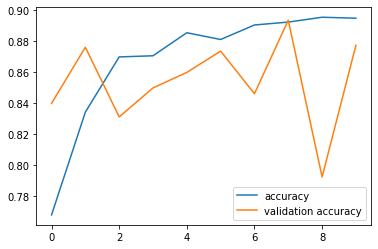

In [20]:
# Accuracy and Validation Accuracy
plt.plot(hist_vgg16.history["accuracy"], label = "accuracy")
plt.plot(hist_vgg16.history["val_accuracy"], label = "validation accuracy")
plt.legend()
plt.show()

## Save And Load Result <a id = "2d"></a>
[Go Content](#cont)

In this chapter, I registered the results of the model and after I read the result I saved again, I visualized its. I visualized it to see if I recorded it correctly.

### Save Result <a id = "2d1"></a>
[Go Content](#cont)

In this chapter, I registered the result of the vgg16 model.

In [21]:
import json, codecs
with open("deneme.json","w") as f:
    json.dump(hist_vgg16.history, f)

### Load Result <a id = "2d2"></a>
[Go Content](#cont)

In this chaper, I read the result I saved again, I visualized its.

In [22]:
with codecs.open("./deneme.json","r", encoding = "utf-8") as f:
    load_result = json.loads(f.read())

In [ ]:
load_result

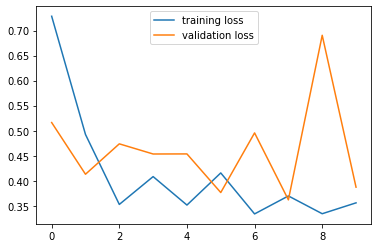

In [24]:
# Loss And Validation Loss
plt.plot(load_result["loss"], label = "training loss")
plt.plot(load_result["val_loss"], label = "validation loss")
plt.legend()
plt.show()

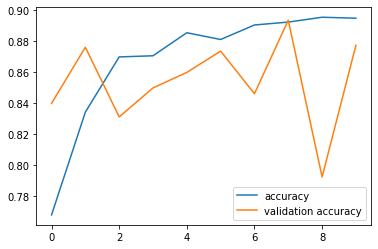

In [25]:
# Accuracy And Validation Accuracy
plt.plot(load_result["accuracy"], label = "accuracy")
plt.plot(load_result["val_accuracy"], label = "validation accuracy")
plt.legend()
plt.show()

In [26]:
# Import VGG19 model
vgg19 = VGG19()

574726144/574710816 [==============================] - 24s 0us/step


In [ ]:
# Layers of vgg19
vgg19.summary()

In [ ]:
# Layers of vgg19 
vgg19_layer_list = vgg19.layers
for i in vgg19_layer_list:
    print(i)

In [29]:
# add the layers of vgg16 in my created model.
vgg19Model = Sequential()
for i in range(len(vgg19_layer_list)-1):
    vgg19Model.add(vgg19_layer_list[i])

In [ ]:
# Finish version of my created model.
vgg19Model.summary()

In [31]:
# Close the layers of vgg16
for layers in vgg19Model.layers:
    layers.trainable = False

In [32]:
# Last layer
vgg19Model.add(Dense(numberOfClass, activation = "softmax"))

In [ ]:
# the final version of the model
vgg19Model.summary()

In [34]:
# I create compile part.
vgg19Model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

## Train Model <a id = "3b"></a>
[Go Content](#cont)

In this chapter, I am training with the model at the dataset, and after, I saved the weight of the model.

In [35]:
# Training with my created model
hisy_vgg19 = vgg19Model.fit_generator(train_data,
                               steps_per_epoch = 1600 // batch_size,
                               epochs = 10,
                               validation_data = test_data,
                               validation_steps = 800 // batch_size)

Epoch 1/10
50/50 [==============================] - 10s 179ms/step - loss: 0.6645 - accuracy: 0.7756 - val_loss: 0.4839 - val_accuracy: 0.8300
Epoch 2/10
50/50 [==============================] - 8s 168ms/step - loss: 0.4335 - accuracy: 0.8450 - val_loss: 0.4562 - val_accuracy: 0.8687
Epoch 3/10
50/50 [==============================] - 8s 159ms/step - loss: 0.3635 - accuracy: 0.8662 - val_loss: 0.5627 - val_accuracy: 0.8200
Epoch 4/10
50/50 [==============================] - 8s 160ms/step - loss: 0.4020 - accuracy: 0.8745 - val_loss: 0.4076 - val_accuracy: 0.8763
Epoch 5/10
50/50 [==============================] - 8s 152ms/step - loss: 0.3939 - accuracy: 0.8701 - val_loss: 0.4427 - val_accuracy: 0.8687
Epoch 6/10
50/50 [==============================] - 7s 142ms/step - loss: 0.3845 - accuracy: 0.8769 - val_loss: 0.5100 - val_accuracy: 0.8487
Epoch 7/10
50/50 [==============================] - 7s 143ms/step - loss: 0.3218 - accuracy: 0.8963 - val_loss: 0.3566 - val_accuracy: 0.8863
Epoch

## Visualize The Results Of Model <a id = "3c"></a>
[Go Content](#cont)

In this chapter, I visualized the result of the vgg19 model.

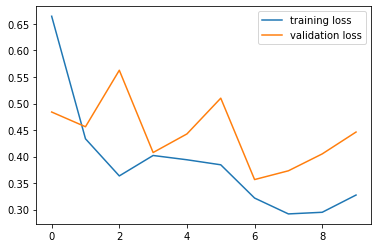

In [36]:
# Loss And Validation Loss
plt.plot(hisy_vgg19.history["loss"], label = "training loss")
plt.plot(hisy_vgg19.history["val_loss"], label = "validation loss")
plt.legend()
plt.show()

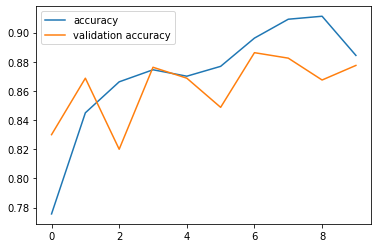

In [37]:
# Accuracy And Validation Accuracy
plt.plot(hisy_vgg19.history["accuracy"], label = "accuracy")
plt.plot(hisy_vgg19.history["val_accuracy"], label = "validation accuracy")
plt.legend()
plt.show()

# CONCLUSION <a id = "4"></a>
---
[Go Content](#cont)

I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np


def predict_image(model, image_path):
    

    # Load the image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # You can map the predicted class index to your actual class labels here
    # For example, if you have a list of class labels ["cat", "dog", "flower"], you can do:
    # class_labels = ["class1", "class2", "class3"]  # Replace with your actual class labels
    # predicted_label = class_labels[predicted_class]

    return predicted_class

# Example usage:
image_path = "20329.jpg"
predicted_class = predict_image(vgg16Model, image_path)
print(f"Predicted class: {predicted_class}")
